<a href="https://colab.research.google.com/github/LesNEIGE/r_stastics/blob/master/16regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀

In [ ]:
# A회사 광고비 지출이 매출에 어느정도 영향 미치는지 파악.
# 아울러 회귀분석 통해 광고비 증가시(30) 매출액은 얼마나 증가할지 예상.

# R에서 선형회귀는 1m, predict 함수를 사용
# lm(종속 ~ 독립)


In [ ]:
ad = c(13,8,10,15,12,15,14,15,17,19,20,21,22,21,25)
sales = c(94,70,90,100,95,100,85,95,105,105,110,105,104,105,121)

In [ ]:
lm(sales~ad)
# 절편 : 62.93, 기울기 : 2.19
# y = 62.93 + 2.19*x

# 광고비 30 투입시 매출액은?
# 62.93 + 2.19*30 


Call:
lm(formula = sales ~ ad)

Coefficients:
(Intercept)           ad  
     62.929        2.186  


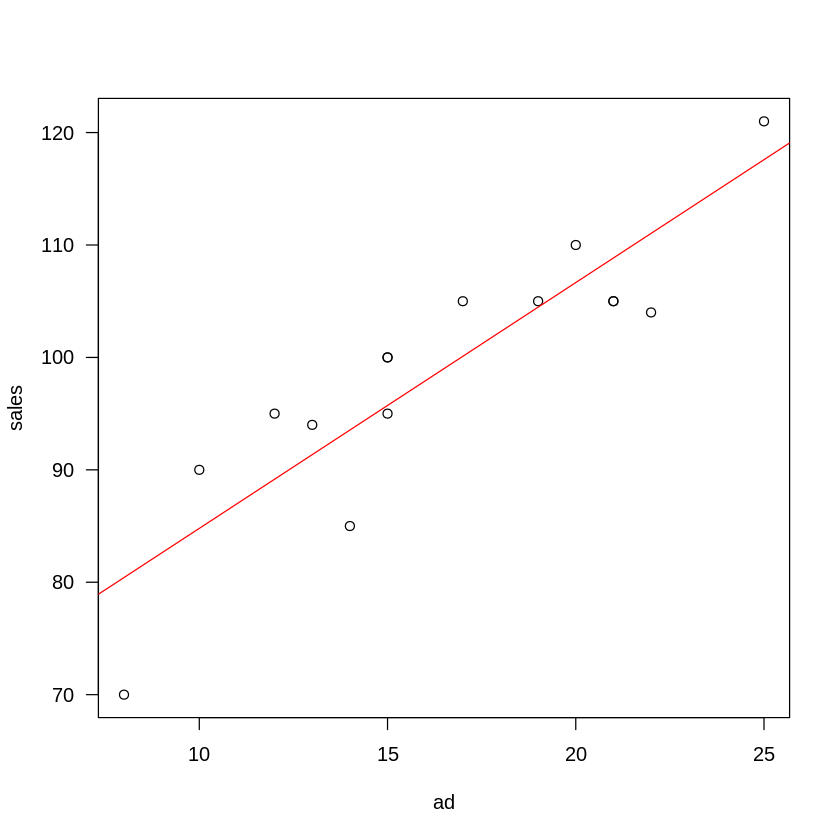

In [ ]:
# 회귀모델 시각화
plot(ad, sales, las = 1)
abline(lm(sales~ad), col = 'red')

In [ ]:
# 회귀분석
*상관분석은 변수들이 얼마나 밀접한 관계를 가지고있는지 분석하는 통계기법
*한편 회귀본석 ( 상관분석 + 예측) 하는 통계기법
*수량형 값을 예측하는데 주로 사용되는 통계모형
  +즉 변수간 선형관계를 식으로 표현하고
  +독립변수가 주어지면 종속변수의 값이 얼마인지 추정
*독립변수와 종속변수 사이의 관계를 선형방정식으로 나타낸것을 회귀방정식이라함
$ y = \alpha + \beta x + \epsilon $
$ \alpha $ : 절편 intercept
$ \beta $ : 기울기
$ \epsilon $ : 잡음, 오차유발요소
# R에서는 회귀모델 만들때 lm함수 이용

ERROR: ignored

In [ ]:
# cars 데이터셋을 이용해서 속도에 따른 제동거리를 예측
# 회귀방정식과 시각화 그래프
# 속도가 30, 35, 40 일때 제동거리 예측

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10



Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  


[1] 100.321 119.971 139.621

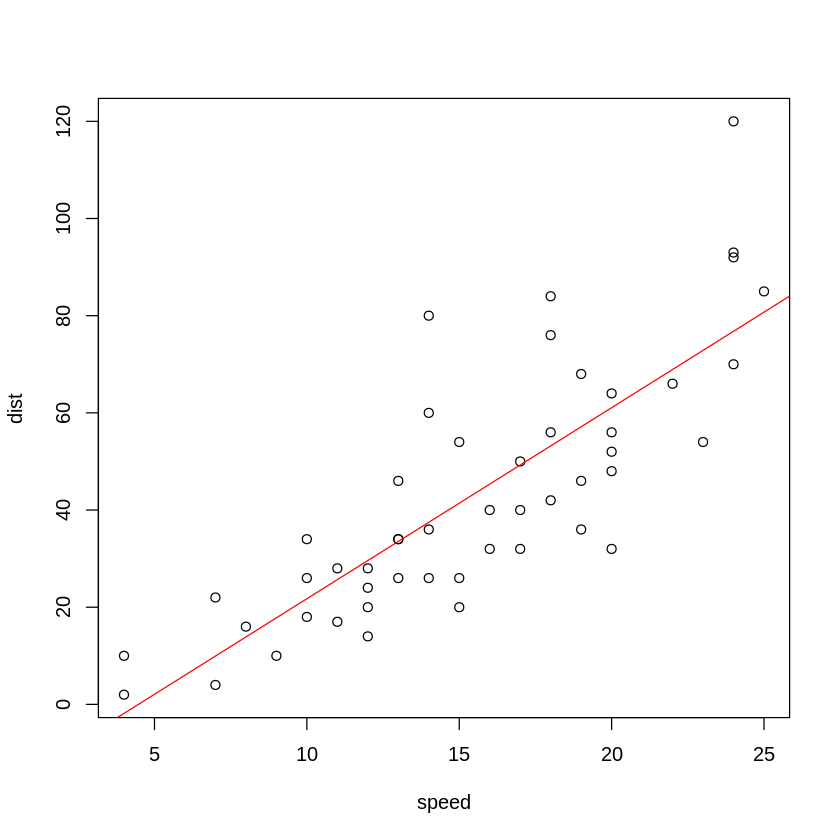

In [ ]:
plot(cars)
lm(dist~speed, cars)
abline(lm(dist~speed, cars), col = 'red')
x = c(30, 35,40)
-17.579 + 3.93*x

In [ ]:
# 단순선형 회귀식을 직접 구해보기
# 상관계수 및 표준편차로 절편과 기울기 계산
# 절편 : mean(종속변수) - 기울기*mean(독립변수)
# 기울기 : 상관계수*(sd(종속변수)/sd(독립변수))

In [ ]:
s <- cars$speed
d <- cars$dist
b <- cor(s, d) * (sd(d) / sd(s))
a <- mean(d) - b*mean(s)
a
b

[1] -17.57909

[1] 3.932409

[1] 62.92913

[1] 2.18649

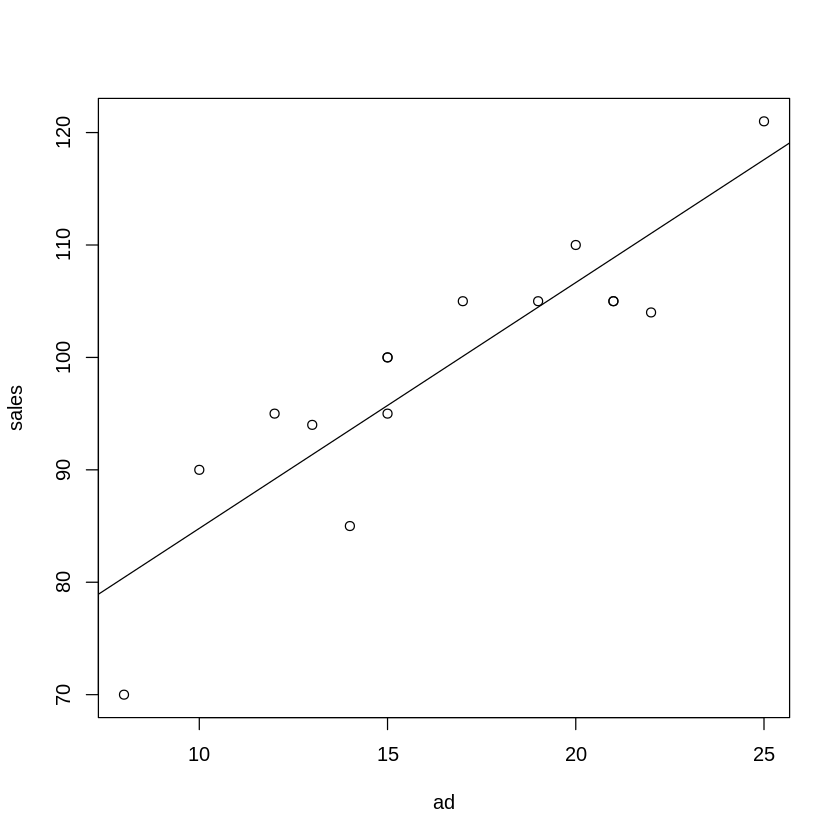

In [ ]:
# 광고비
b <- cor(ad, sales) * (sd(sales) / sd(ad))
a <- mean(sales) - b*mean(ad)
a
b
plot(ad, sales)
abline(lm(sales~ad), col = 'black')

In [ ]:
# 최소제곱법(독립변수가 하나일때 적용)
# 기울기 = (x - x평균)*(y - y평균)의 합 / (x - x평균)제곱의 합
# 절편 = y평균 - (x평균 * 기울기)

In [ ]:
# b <- sum((ad - mean(ad))*(sales - mean(sales))) / sum((ad - mean(ad))^2)
upper <- sum((ad - mean(ad))*(sales - mean(sales)))
lower <- sum((ad - mean(ad))^2)
b <- upper/ lower
a <- mean(sales) - mean(ad)*b
a
b


[1] 62.92913

[1] 2.18649

In [ ]:
ms <- mean(s)
md <- mean(d)

upper <- sum((s - ms)*(d- md))
lower <- sum((s - ms)**2)
b <- upper / lower
a <- md - (ms * b)
b
a

[1] 3.932409

[1] -17.57909

[1] 2.3

[1] 79

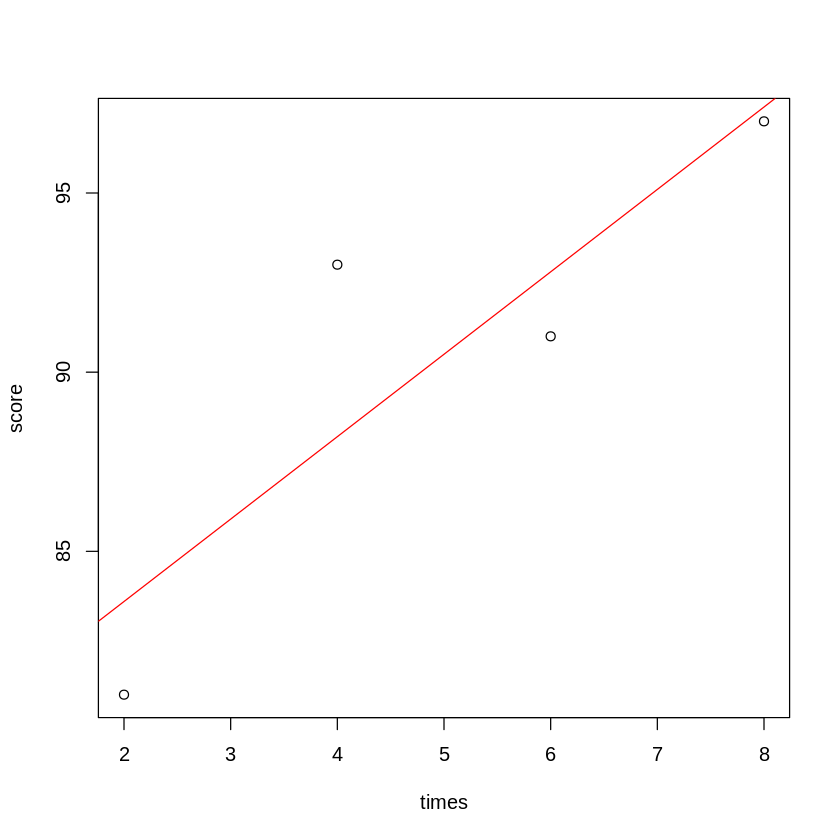

In [ ]:
# 시험시간과 성적데이터를 이용해서 회귀식 구하고 시각화
# 10시간 공부시 점수는?
times = c(2, 4, 6, 8)
score = c(81, 93, 91, 97)

b <- sum((times - mean(times))*(score - mean(score))) / sum((times - mean(times))^2)
a <- mean(score) - (mean(times)*b)
b
a
plot(times, score)
abline(lm(score~times), col = 'red')

In [ ]:
# 회귀식의 예측력 평가
model <- lm(score~times)
summary(model)


Call:
lm(formula = score ~ times)

Residuals:
   1    2    3    4 
-2.6  4.8 -1.8 -0.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   79.000      4.990  15.832  0.00397 **
times          2.300      0.911   2.525  0.12756   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.074 on 2 degrees of freedom
Multiple R-squared:  0.7612,	Adjusted R-squared:  0.6417 
F-statistic: 6.373 on 1 and 2 DF,  p-value: 0.1276


In [ ]:
# 분석결과 알아보기
# 결정계수(multiple R-squared, R^2) : 0.85이상인 경우 회귀모형의 의미가 있음
# 회귀계수 유의성 : 유의확률이 0.0. 이하인 경우 회귀계수가 나름 유의미 함
# 조정된 결정계수(adjusted multiple R-squared, R^2)
# -> 표본의 수가 많아지면 정확도가 올라가는데 이러한 부분을 제약하기 위해 사용하는 지표

# F 통계값과 P-value
# 회귀모형에 대한 통계적 유의미 검증결과를 의미
# 독립변수와 종속변수의 관계가 선형으로 볼 수 있는지 파악


In [ ]:
# 광고비 대비 매출액을 산출하는 회귀모형에 대해 분석
# 차량 속도 대비 제동거리 회귀모형 분석

In [ ]:
admodel <- lm(sales~ad)
summary(admodel)


Call:
lm(formula = sales ~ ad)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.421  -3.845   2.647   4.274   5.833 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  62.9291     5.3739   11.71 2.80e-08 ***
ad            2.1865     0.3142    6.96 9.92e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.635 on 13 degrees of freedom
Multiple R-squared:  0.7884,	Adjusted R-squared:  0.7721 
F-statistic: 48.44 on 1 and 13 DF,  p-value: 9.921e-06


In [ ]:
cmodel <- lm(cars$dist~cars$speed)
# or lm(dist~speed , cars)
summary(cmodel)


Call:
lm(formula = cars$dist ~ cars$speed)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
cars$speed    3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


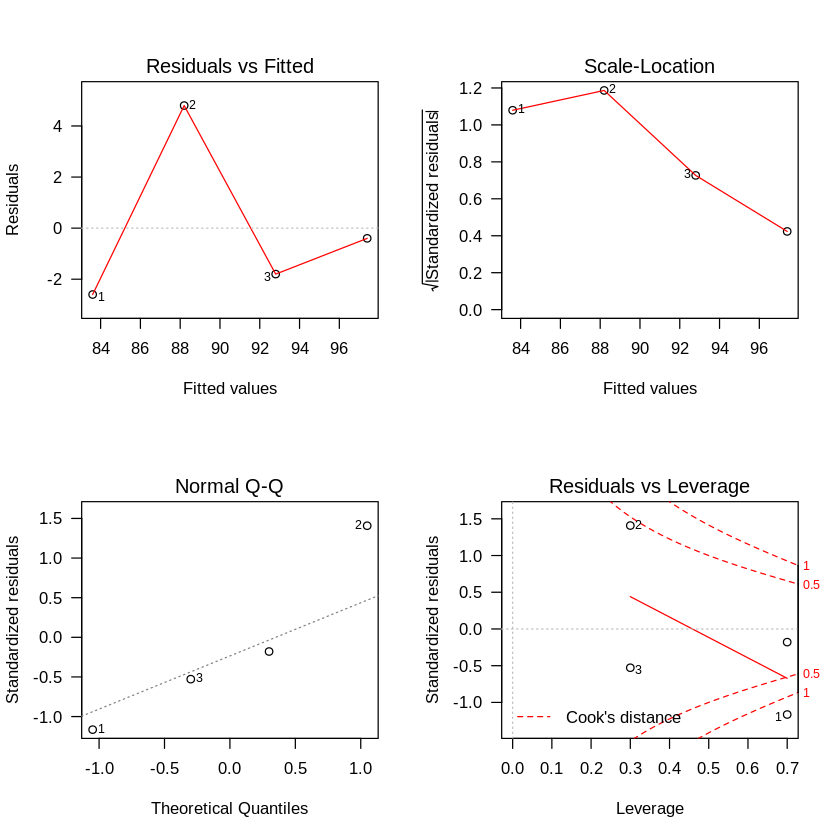

In [ ]:
# 회귀모형의 적합성 검정
# 광고비 대비 매출액을 예측하는 회귀모형을 만들었는데
# 이것이 과연 적합한 것인지?
# 회귀모형 작성시 적절한 필요조건을 만족하는지 알아봄
# 선형성 / 정규성 / 분산성 / 독립성
#1) 선형성 : 잔차 예측비교도
    잔차를 표준화시켜 정규분포를 따르는지 확인
    점선은 직선에 가깝게, 분포의 모양이 위 아래 균등하게 배치
#2) 정규성 : 독립변수가 정규성을 띄면 잔차도 정규분포를 띄는가?
    45도 점선에 점들이 가깝게 배치
    단, 양 끝점들은 점선에서 벗어나도 무난
#3) 분산성 : 잔차 분산비교도
    독립변수의 분산이 일정하면? 잔차도 비숫한 양상을 띄는가?
    점선은 직선에 가깝게, 분포의 모양이 위 아래 균등하게 배치
#4) 독립성 : 잔차의 영향력 파악
    cook's distance
    회귀방정식의 계수결정에 불균형한 영향을 미치는 독립변수 존재 파악
    회귀분석에서 잔차의 크기가 큰 데이터는 보통 이상치로 취급
    cook's distance를 통해 잔차와 리버레지를 동시에 볼수 있음
    빨간선은 직선에 가깝게, 점들 분포는 되도록 빨간선에 가깝게,
    단, 빨간점선 밖은 벗어나지 않게
par(mfcol = c(2,2))
plot(model, las = 1)

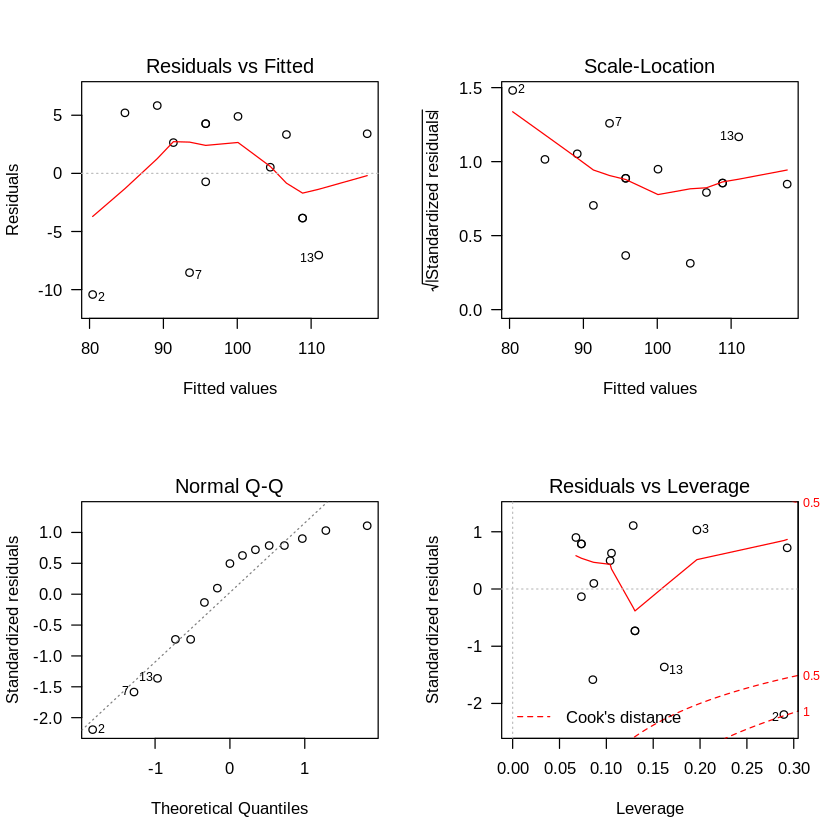

In [ ]:
par(mfcol = c(2,2))
plot(admodel, las = 1)

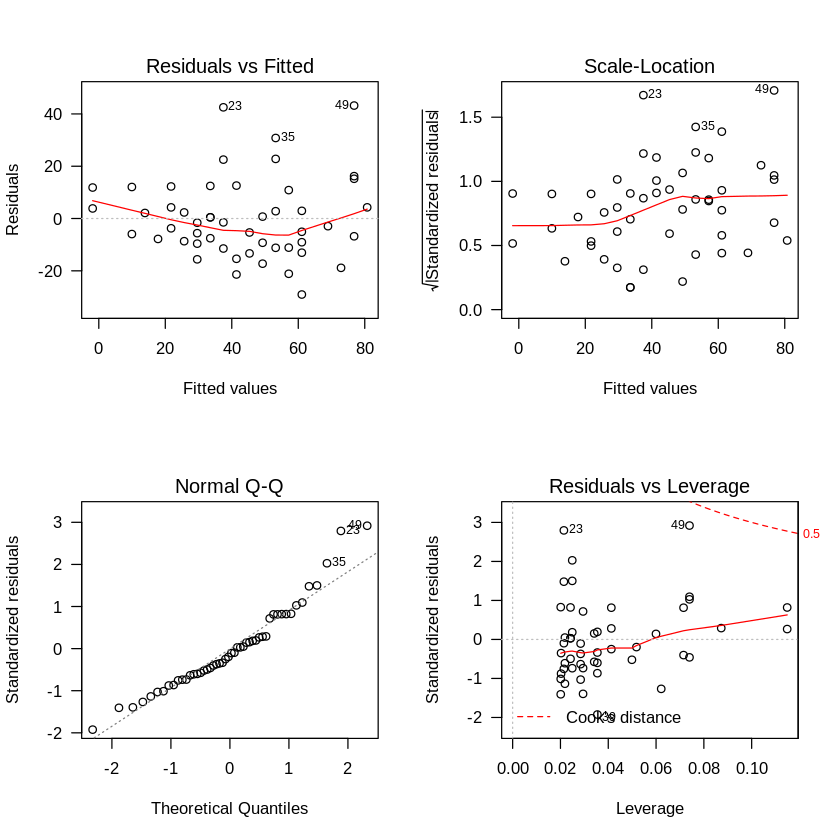

In [ ]:
par(mfcol = c(2,2))
plot(cmodel, las = 1)

In [ ]:
# applewood 데이터에서
# 구매자 연령과 판매이익간의 관계
# 최소제곡법 이용 선형방정식
aw <- read.csv('https://raw.githubusercontent.com/LesNEIGE/r_stastics/master/datasets/applewood.txt', header = T, sep = '', stringsAsFactor = F)
head(aw)
#gsub(찾을문자 , 바꿀문자 , 대상)
# profit <- gsub(',' , '', profit)
# profit <- gsub('\\$' , '', profit)
# profit <- as.numeric(profit)

,Age,Profit,Location,Vehicle.Type,Previous
,<int>,<chr>,<chr>,<chr>,<int>
1,21,"$1,387",Tionesta,Sedan,0
2,23,"1,754",Sheffield,SUV,1
3,24,"1,817",Sheffield,Hybrid,1
4,25,"1,040",Sheffield,Compact,0
5,26,"1,273",Kane,Sedan,1
6,27,"1,529",Sheffield,Sedan,1


[1] 15.96746

[1] -27587.52

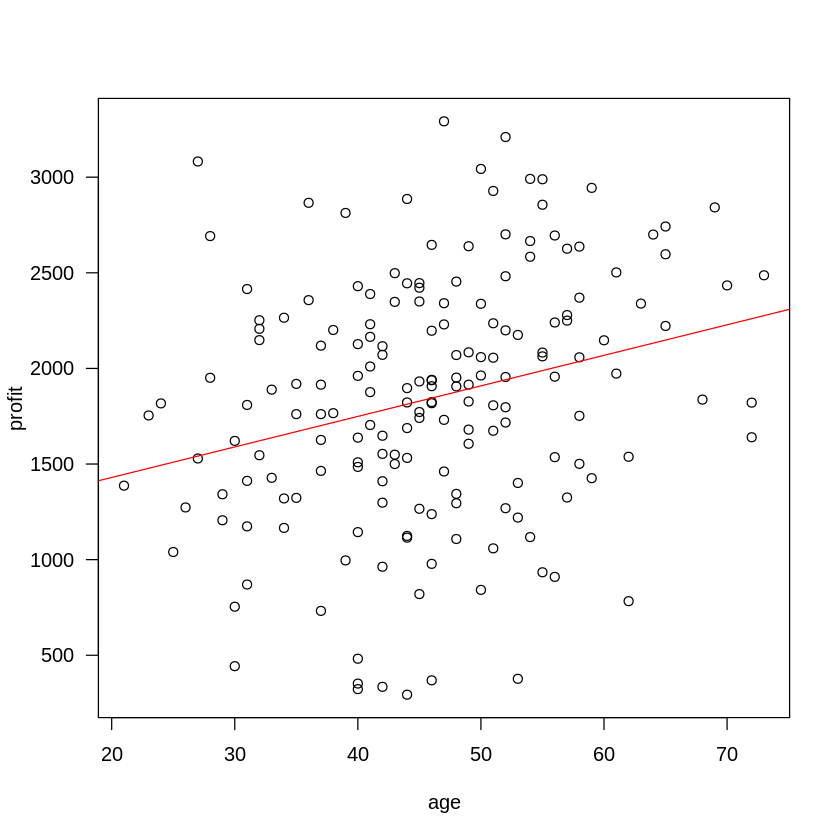

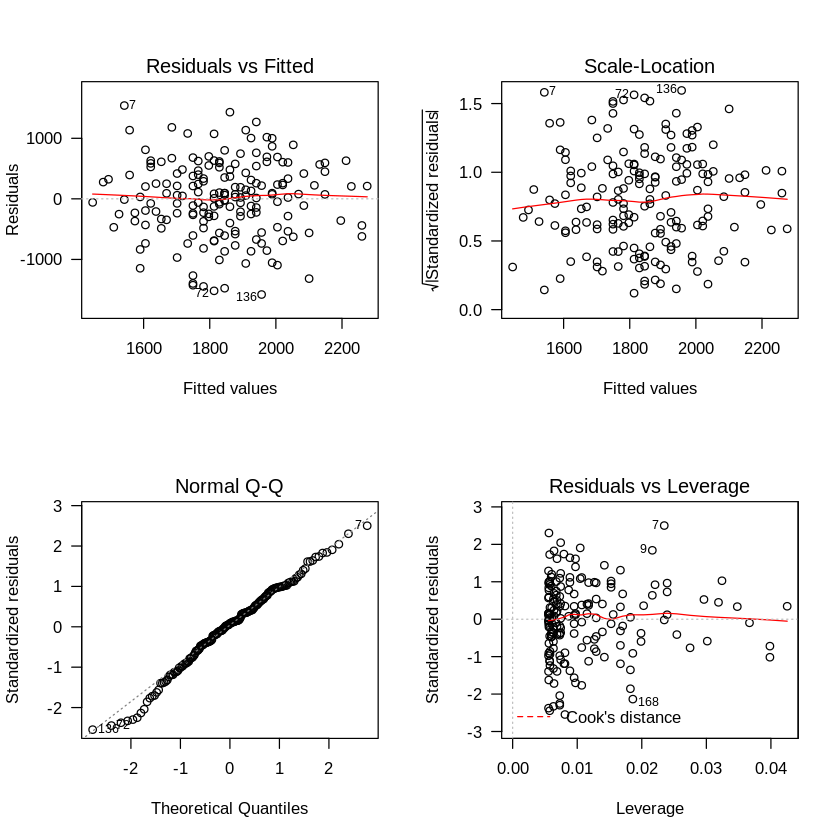

In [ ]:
age <- aw$Age
profit <- aw$Profit
profit <- gsub(',' , '', profit)
profit <- gsub('\\$' , '', profit)
profit <- as.numeric(profit)

b <- sum((age - mean(age))*(profit - mean(profit))) / sum((age - mean(age))^2)
a <- mean(profit) - mean(profit)*b
b
a
plot(age, profit,las = 1)
abline(lm(profit~age), col = 'red')
par(mfcol = c(2,2))
plot(lm(profit~age), las = 1)


In [ ]:
# 다른 시의 경찰관 수와 범죄 발생건수를 토대로 산점도 그리고
# 상관계수와 회귀방정식 구해서 경찰관 수가 20일 때 범죄 발생율은?
city <- read.csv('https://raw.githubusercontent.com/LesNEIGE/r_stastics/master/citycrime.txt' , header = T , sep = '') #sep = '\t'
head(city)

,City,Police,Crimes
,<fct>,<int>,<int>
1,Oxford,15,17
2,Straksville,17,13
3,Danville,25,5
4,Athens,27,7
5,Holgate,17,7
6,Carey,12,21


[1] -0.8743956

[1] -0.9596273

[1] 23.27057


Call:
lm(formula = cr ~ po)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0745 -0.8672  0.0466  2.2865  3.5217 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.3882     4.1434   7.093 0.000394 ***
po           -0.9596     0.2174  -4.414 0.004499 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.378 on 6 degrees of freedom
Multiple R-squared:  0.7646,	Adjusted R-squared:  0.7253 
F-statistic: 19.49 on 1 and 6 DF,  p-value: 0.004499


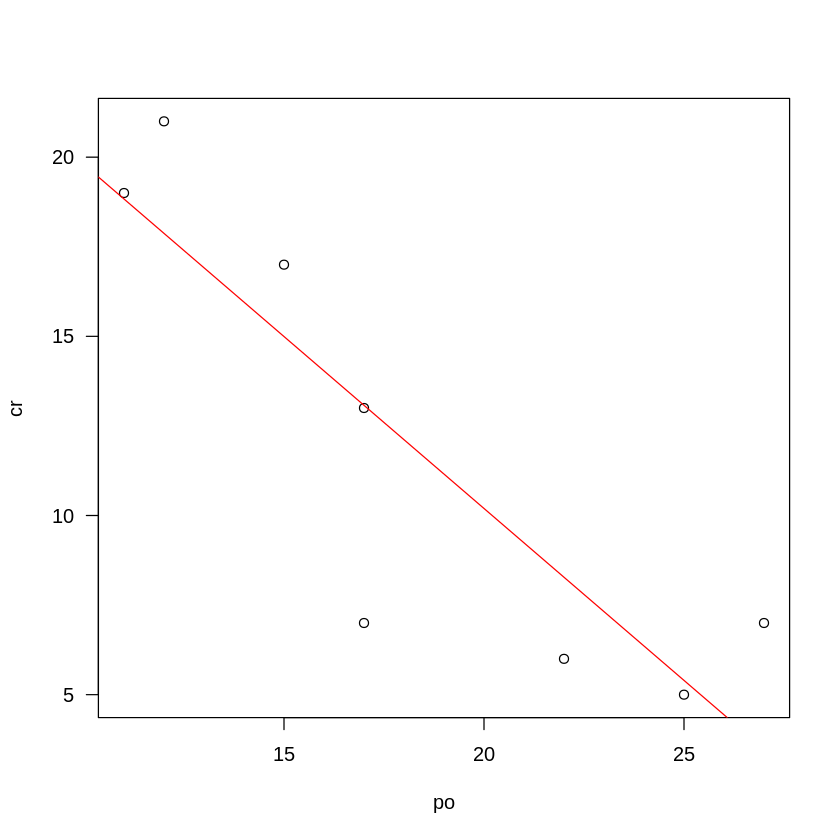

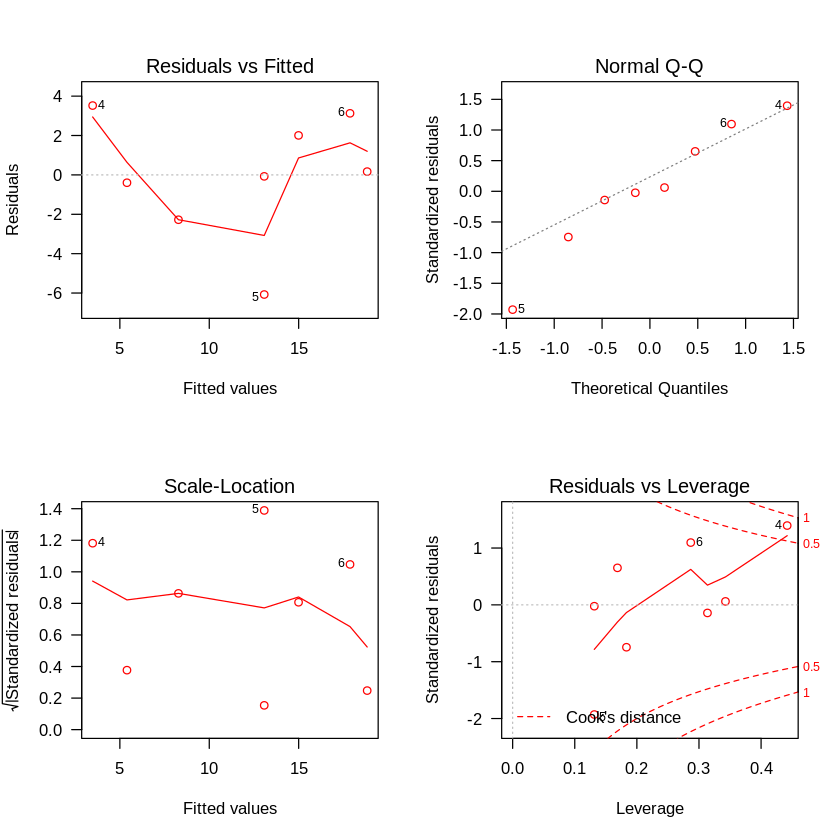

In [73]:
po <- city$Police
cr <- city$Crimes
cor(po, cr)
b <- sum((po - mean(po))*(cr - mean(cr))) / sum((po - mean(po))^2)
a <- mean(cr) - mean(cr)*b
b
a
plot(po, cr , las = 1)
abline(lm(cr~po), col = 'red')
summary(lm(cr~po))
par(mfrow = c(2,2))
plot(lm(cr~po), col = 'red' , las = 1)

In [ ]:
# 예측구간 추정
# 추정치의 표준오차와 결정계수를 통해
# 회귀식의 종속변수 예측에 대한 전반적인 평가를 내림
# 회귀식의 예측력을 표현하는 또 다른 방법은
# 독립변수의 특정값을 신뢰구간으로 계산하여 제시

In [86]:
# 차량속도 대비 제동거리에 대한 회귀모형에 대해
# 속도가 35, 40, 45일때 제동거리를 신뢰구간 95%로 예측구간 분석

# R에서 제공하는 함수를 통해 신뢰 / 예측구간을 알 수 있음

model <- lm(dist~speed, cars)
coef(model) #회귀계수(절편, 기울기)
residuals(model) #추정치 잔차
deviance(model) #잔차제곱
sqrt(deviance(model))
confint(model) #회귀계수 신뢰구간

#predict(model, interval = 'confidence', newdata = 데이터프레임) #신뢰구간
#predict(model, interval = 'prediction', newdata = 데이터프레임) #예측구간
predict(model, interval = 'confidence', newdata = data.frame(speed = c(30, 40, 45)))
predict(model, interval = 'prediction', newdata = data.frame(speed = c(30, 40, 45)))

(Intercept)       speed 
 -17.579095    3.932409

1          2          3          4          5          6          7 
  3.849460  11.849460  -5.947766  12.052234   2.119825  -7.812584  -3.744993 
         8          9         10         11         12         13         14 
  4.255007  12.255007  -8.677401   2.322599 -15.609810  -9.609810  -5.609810 
        15         16         17         18         19         20         21 
 -1.609810  -7.542219   0.457781   0.457781  12.457781 -11.474628  -1.474628 
        22         23         24         25         26         27         28 
 22.525372  42.525372 -21.407036 -15.407036  12.592964 -13.339445  -5.339445 
        29         30         31         32         33         34         35 
-17.271854  -9.271854   0.728146 -11.204263   2.795737  22.795737  30.795737 
        36         37         38         39         40         41         42 
-21.136672 -11.136672  10.863328 -29.069080 -13.069080  -9.069080  -5.069080 
        43         44         45         46         47         48         49 
  2.930920  -2.933898 -18.866307  -6.798715  15.201285  16.201285  43.201285 
        50 
  4.268876

[1] 11353.52

[1] 106.5529

,2.5 %,97.5 %
(Intercept),-31.167850,-3.990340
speed,3.096964,4.767853


,fit,lwr,upr
1,100.3932,87.43543,113.3509
2,139.7173,118.70521,160.7293
3,159.3793,134.26645,184.4922


,fit,lwr,upr
1,100.3932,66.86529,133.9210
2,139.7173,102.33114,177.1034
3,159.3793,119.54375,199.2148


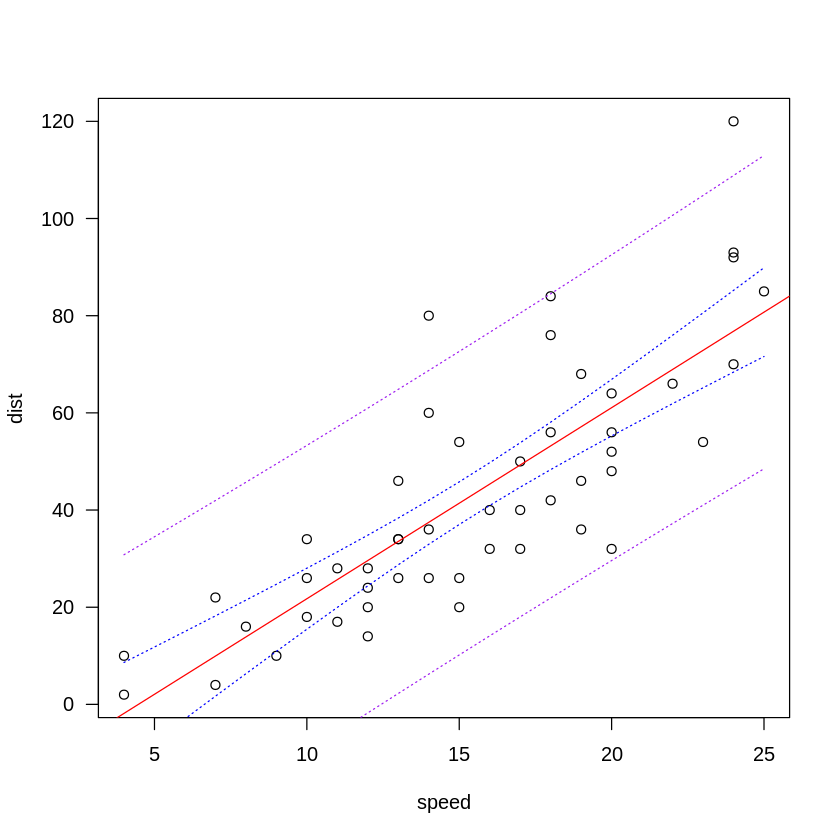

In [95]:
# 신뢰구간 / 예측구간을 그래프로 그려보기
# 매끈한 선으로 그래프를 그리기 위해
# 독립 / 종속변수를 재생성
speed <- seq(min(cars$speed), max(cars$speed), 1)
# 차량속도의 구간을 최소값에서 최대값사이 1간격으로 재설정
cdist <- predict(model, interval = 'confidence', newdata = data.frame(speed = speed))
pdist <- predict(model, interval = 'prediction', newdata = data.frame(speed = speed))

plot(cars, las = 1)
abline(model, col = 'red')
lines(speed, cdist[,2], col = 'blue' , lty = 3) #하한
lines(speed, cdist[,3], col = 'blue' , lty = 3) #상한

lines(speed, pdist[,2], col = 'purple' , lty = 3) #상한
lines(speed, pdist[,3], col = 'purple' , lty = 3) #상한

In [96]:
# 식이요법을 적용한 닭에 대한 데이터 (MASS, chickWeight)
# 1번 닭을 대상으로 시간대비 몸무게에 대한 회귀분석 실시

install.packages('MASS')
library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
head(ChickWeight)
ChickWeight

In [104]:
mychick <- subset(ChickWeight, Chick == 1)
mychick

,weight,Time,Chick,Diet
,<dbl>,<dbl>,<ord>,<fct>
1,42,0,1,1
2,51,2,1,1
3,59,4,1,1
4,64,6,1,1
5,76,8,1,1
6,93,10,1,1
7,106,12,1,1
8,125,14,1,1
9,149,16,1,1


[1] 0.9791822

[1] 7.987899

[1] -780.3154

(Intercept)         cti 
  24.465436    7.987899

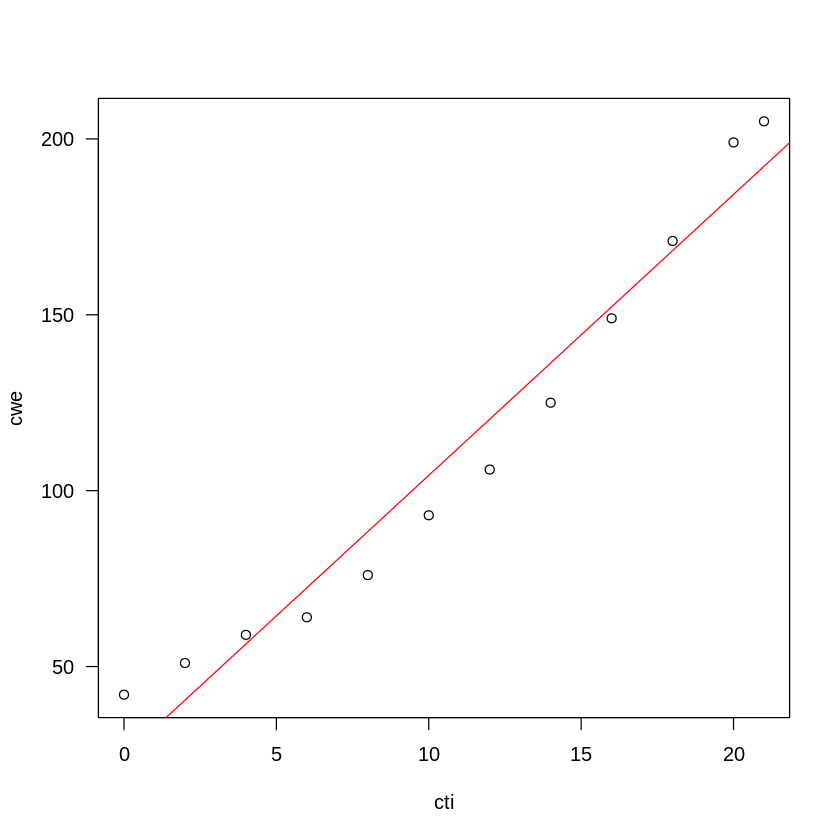


Call:
lm(formula = cwe ~ cti)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.3202 -11.3081  -0.3444  11.1162  17.5346 

Coefficients:
            Estimate Std. Error t value     Pr(>|t|)    
(Intercept)  24.4654     6.7279   3.636      0.00456 ** 
cti           7.9879     0.5236  15.255 0.0000000297 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.29 on 10 degrees of freedom
Multiple R-squared:  0.9588,	Adjusted R-squared:  0.9547 
F-statistic: 232.7 on 1 and 10 DF,  p-value: 0.00000002974


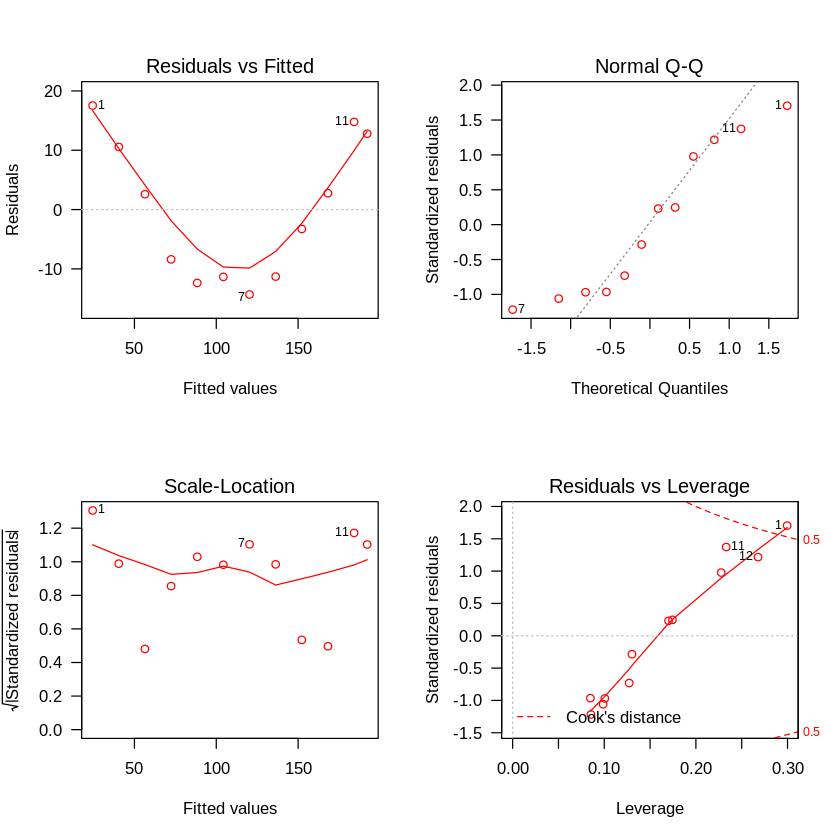

In [114]:
cti <- mychick$Time # <- ChickWeight[ChickWeight$Chick == 1 , 2]
cwe <- mychick$weight # <- ChickWeight[ChickWeight$Chick == 1 , 1]
cor(cti, cwe)
b <- sum((cti - mean(cti))*(cwe - mean(cwe))) / sum((cti - mean(cti))^2)
a <- mean(cwe) - mean(cwe)*b
b
a
ckmodel <- lm(cwe~cti)
coef(lm(cwe~cti)) # y = 24.47 + 7.99x
plot(cti, cwe , las = 1)
abline(lm(cwe~cti), col = 'red')
par(mfrow = c(2,2))
plot(lm(cwe~cti), col = 'red' , las = 1)
options(scipen = 100)
summary(lm(cwe~cti))


In [116]:
install.packages('psych')
library(psych)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’




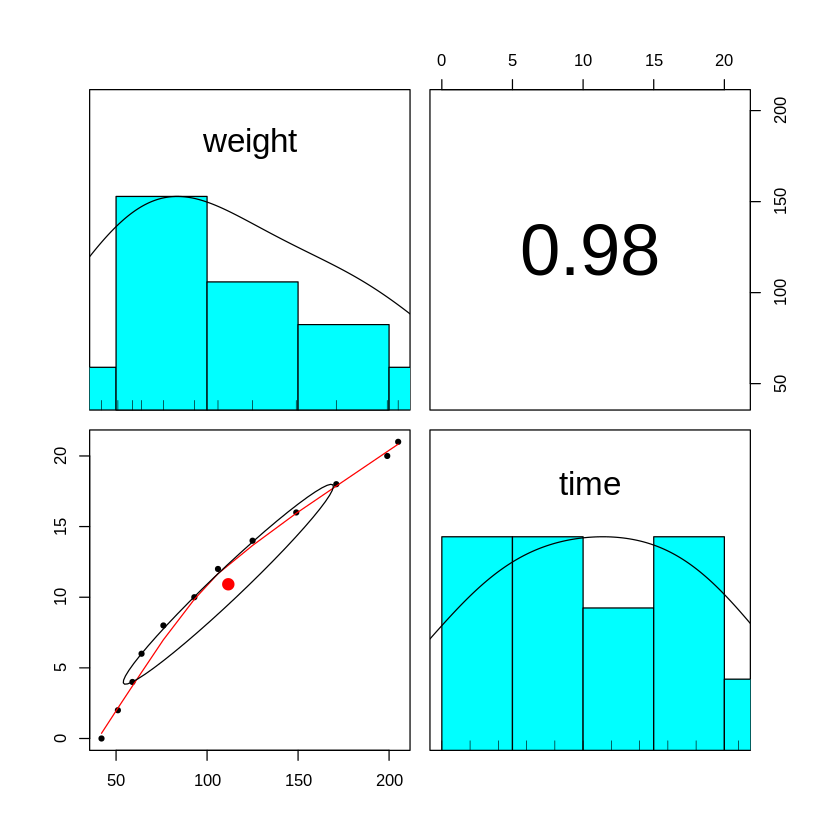

In [117]:
pairs.panels(data.frame(weight = cwe, time = cti))